In [46]:
import numpy as np
import pandas as pd

def compute_metrics(returns: pd.Series):
    cumulative_return = np.exp(returns.cumsum())[-1] - 1
    annual_return = (1 + returns.mean()) ** 252 - 1
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = returns.mean() / returns.std() * np.sqrt(252)
    calmar = annual_return / abs((returns.cumsum() - returns.cumsum().cummax()).min())
    stability = returns.cumsum().corr(pd.Series(np.arange(len(returns)), index=returns.index))
    max_drawdown = (returns.cumsum() - returns.cumsum().cummax()).min()

    downside_std = returns[returns < 0].std()
    sortino = returns.mean() / (downside_std + 1e-8) * np.sqrt(252)

    omega = (returns[returns > 0].sum() / abs(returns[returns < 0].sum()))
    tail_ratio = (returns[returns > returns.quantile(0.95)].mean() /
                  abs(returns[returns < returns.quantile(0.05)].mean()))

    value_at_risk = returns.quantile(0.01)
    skew = returns.skew()
    kurt = returns.kurtosis()

    total_years = len(returns) / 252  # Assuming 252 trading days in a year
    cagr = (1 + cumulative_return) ** (1 / total_years) - 1

    annual_rets  = returns.resample("Y").apply(lambda r: (1 + r).prod() - 1)
    annual_vols  = returns.resample("Y").std() * np.sqrt(252)
    annual_sharpe   = annual_rets / annual_vols
    average_yearly_sharpe = annual_sharpe.mean()

    return {
        "Annual return": annual_return,
        "CAGR": cagr,
        "Cumulative returns": cumulative_return,
        "Annual volatility": annual_vol,
        "Sharpe ratio (averaged by day)": sharpe,
        "Sharpe ratio (averaged by year)": average_yearly_sharpe,
        "Calmar ratio": calmar,
        "Stability": stability,
        "Max drawdown": max_drawdown,
        "Omega ratio": omega,
        "Sortino ratio": sortino,
        "Skew": skew,
        "Kurtosis": kurt,
        "Tail ratio": tail_ratio,
        "Daily value at risk": value_at_risk
        }


/Users/benjaminli/miniforge3/envs/DRL_Portfolio_Optimisation/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/benjaminli/miniforge3/envs/DRL_Portfolio_Optimisation/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/benjaminli/miniforge3/envs/DRL_Portfolio_Optimisation/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strong

count   250.0000
mean      0.5679
std       0.0813
min       0.3741
25%       0.5129
50%       0.5653
75%       0.6229
max       0.7788
dtype: float64


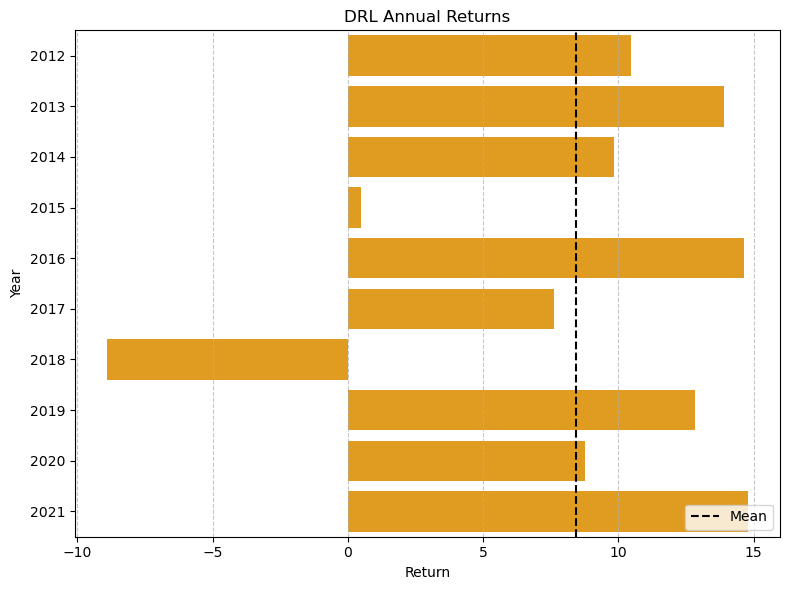

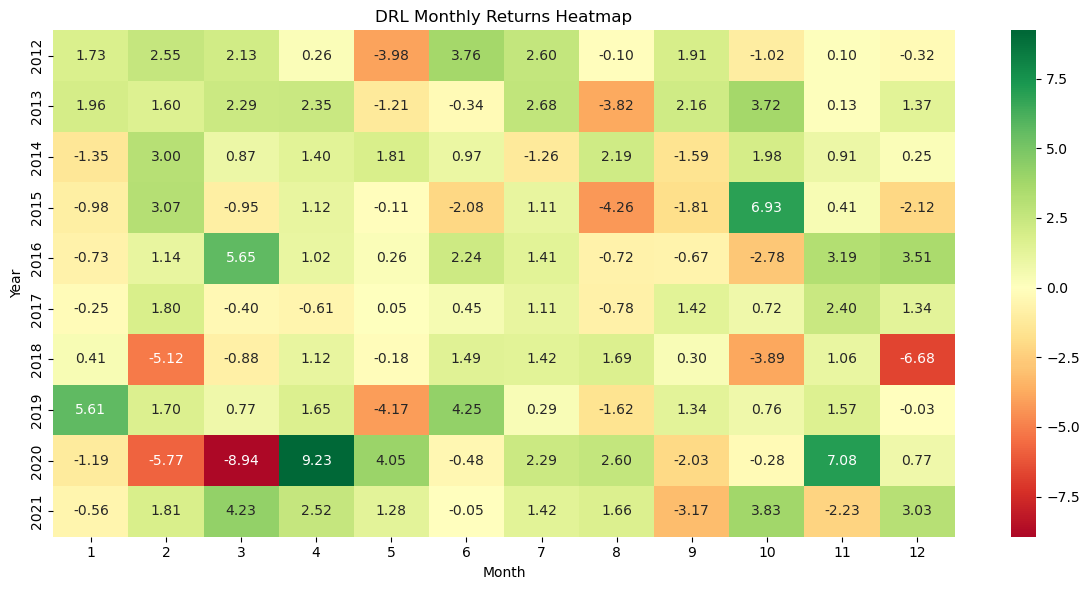

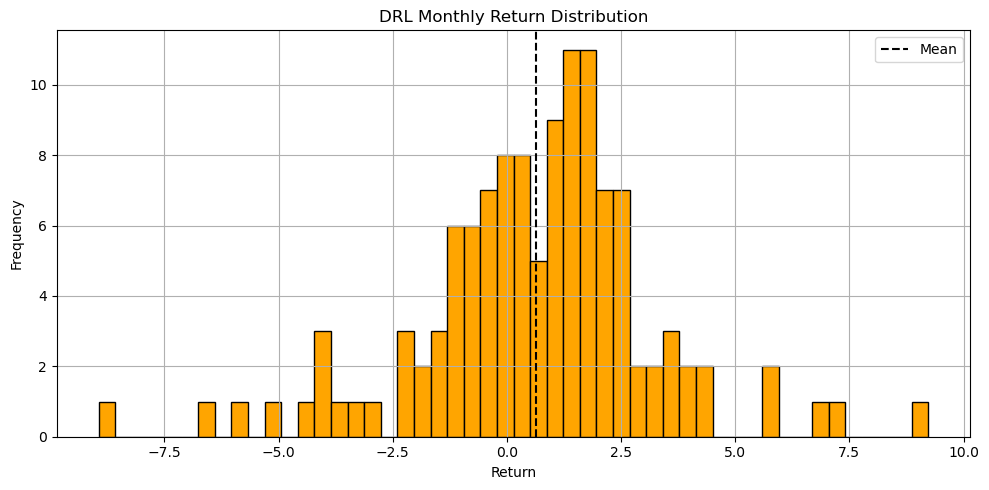

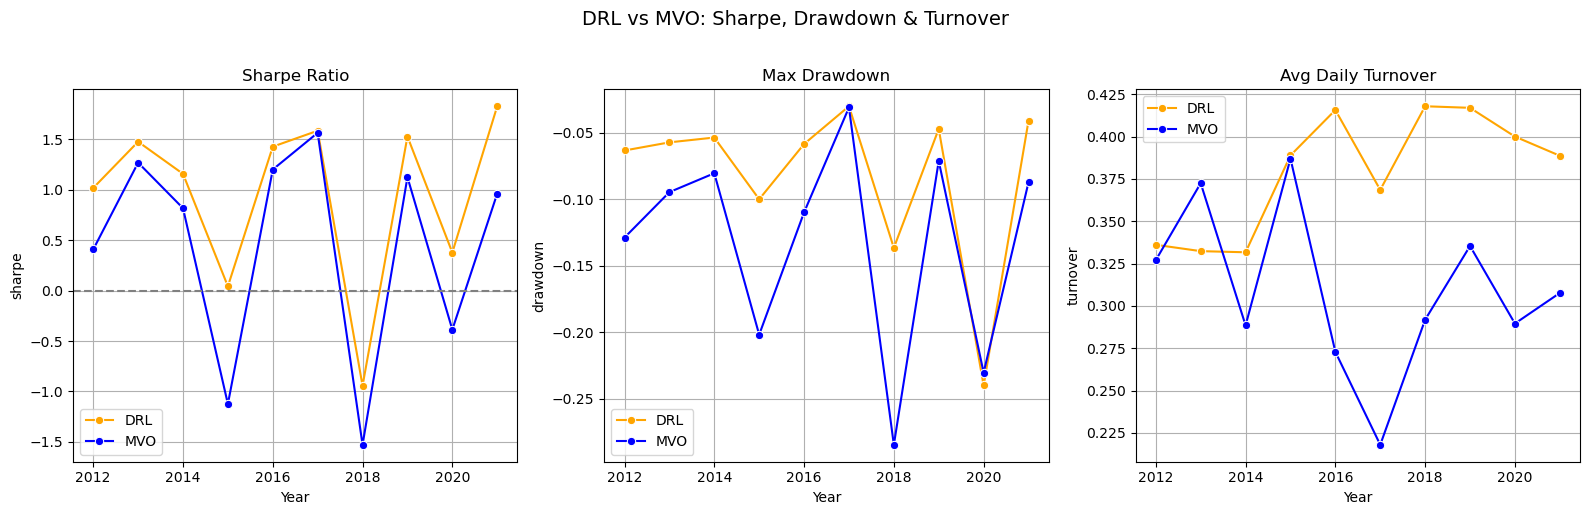

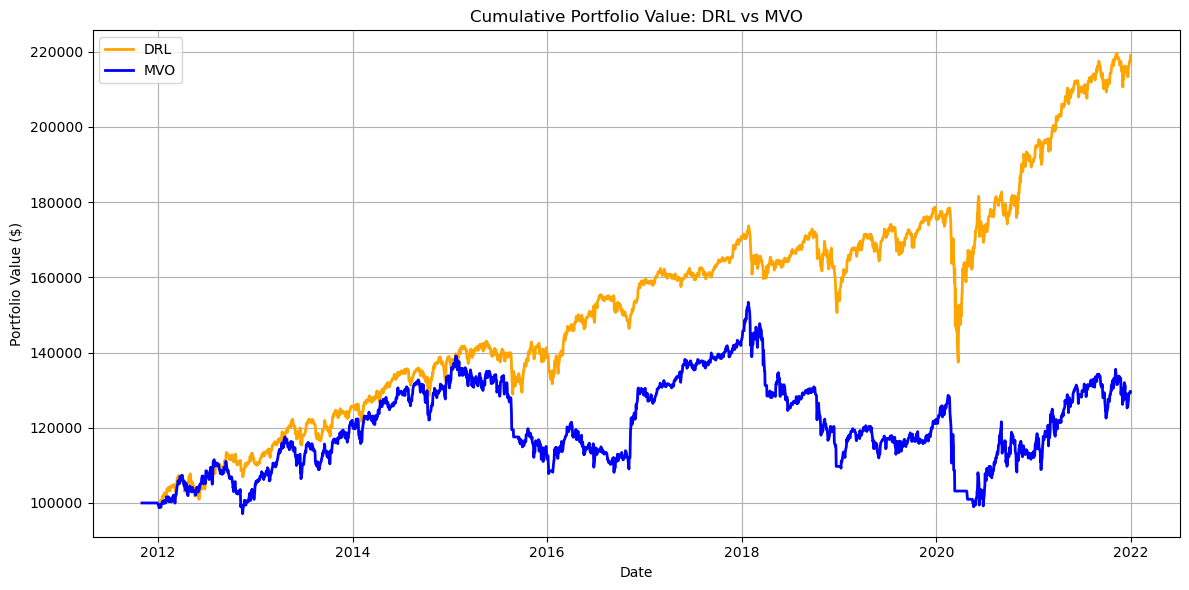

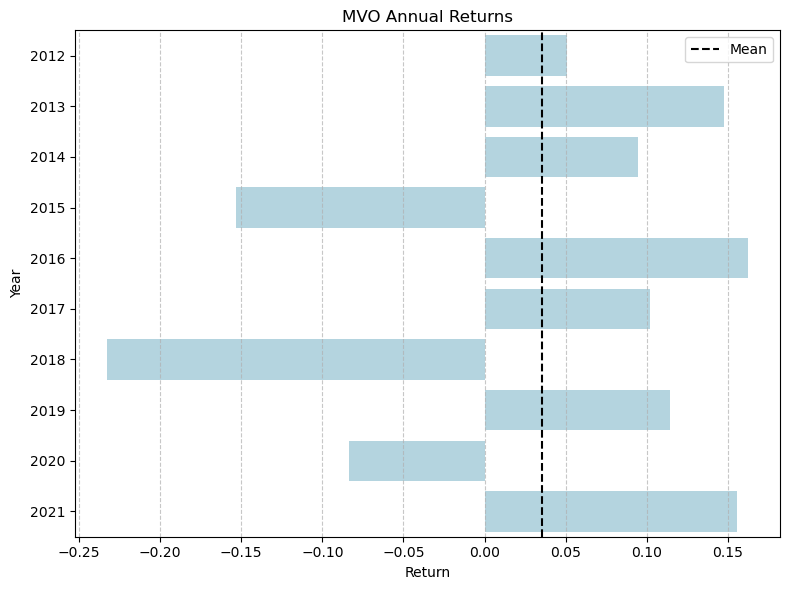

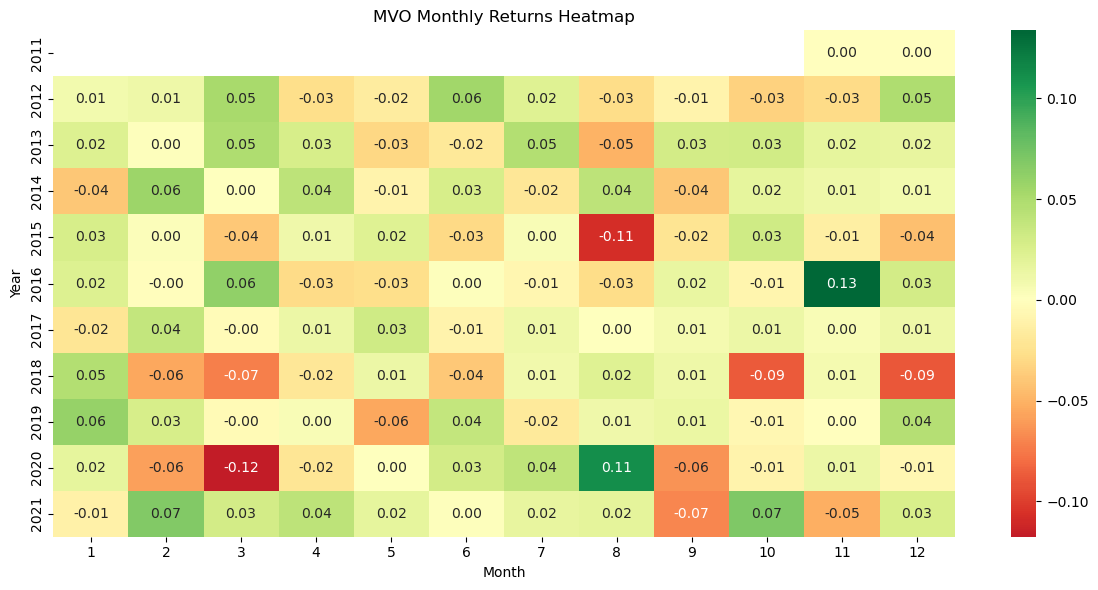

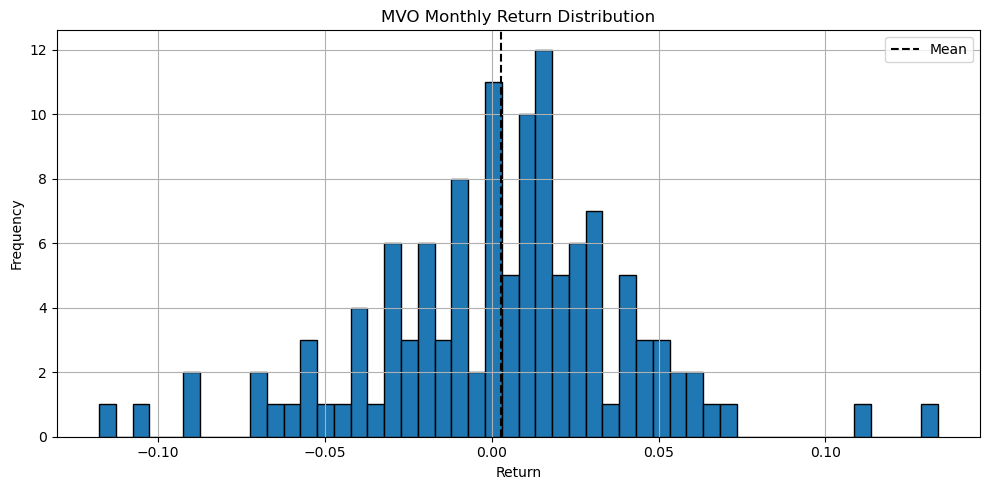

/var/folders/r4/bpvrknrd5mv0mfm2zd9tfsx40000gn/T/ipykernel_33583/2820986331.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = np.exp(returns.cumsum())[-1] - 1
/var/folders/r4/bpvrknrd5mv0mfm2zd9tfsx40000gn/T/ipykernel_33583/2820986331.py:27: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_rets  = returns.resample("Y").apply(lambda r: (1 + r).prod() - 1)
/var/folders/r4/bpvrknrd5mv0mfm2zd9tfsx40000gn/T/ipykernel_33583/2820986331.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_vols  = returns.resample("Y").std() * np.sqrt(252)
/var/folders/r4/bpvrknrd5mv0mfm2zd9tfsx40000gn/T/ipykernel_33583/2820986331.py:5: FutureWarning: Series.__getitem__ treating keys as



=== Full Performance Metrics: DRL vs MVO ===
|    | Metric                          |        DRL |        MVO |
|---:|:--------------------------------|-----------:|-----------:|
|  0 | Annual return                   |  0.0820204 |  0.035491  |
|  1 | CAGR                            |  0.0820337 |  0.0354935 |
|  2 | Cumulative returns              |  1.19031   |  0.424025  |
|  3 | Annual volatility               |  0.109036  |  0.136628  |
|  4 | Sharpe ratio (averaged by day)  |  0.723082  |  0.255278  |
|  5 | Sharpe ratio (averaged by year) |  0.956304  |  0.430923  |
|  6 | Calmar ratio                    |  0.312597  |  0.0863524 |
|  7 | Stability                       |  0.968844  |  0.530147  |
|  8 | Max drawdown                    | -0.262383  | -0.411002  |
|  9 | Omega ratio                     |  1.14963   |  1.04822   |
| 10 | Sortino ratio                   |  0.874477  |  0.313039  |
| 11 | Skew                            | -0.613892  | -0.571486  |
| 12 | Kurtosis

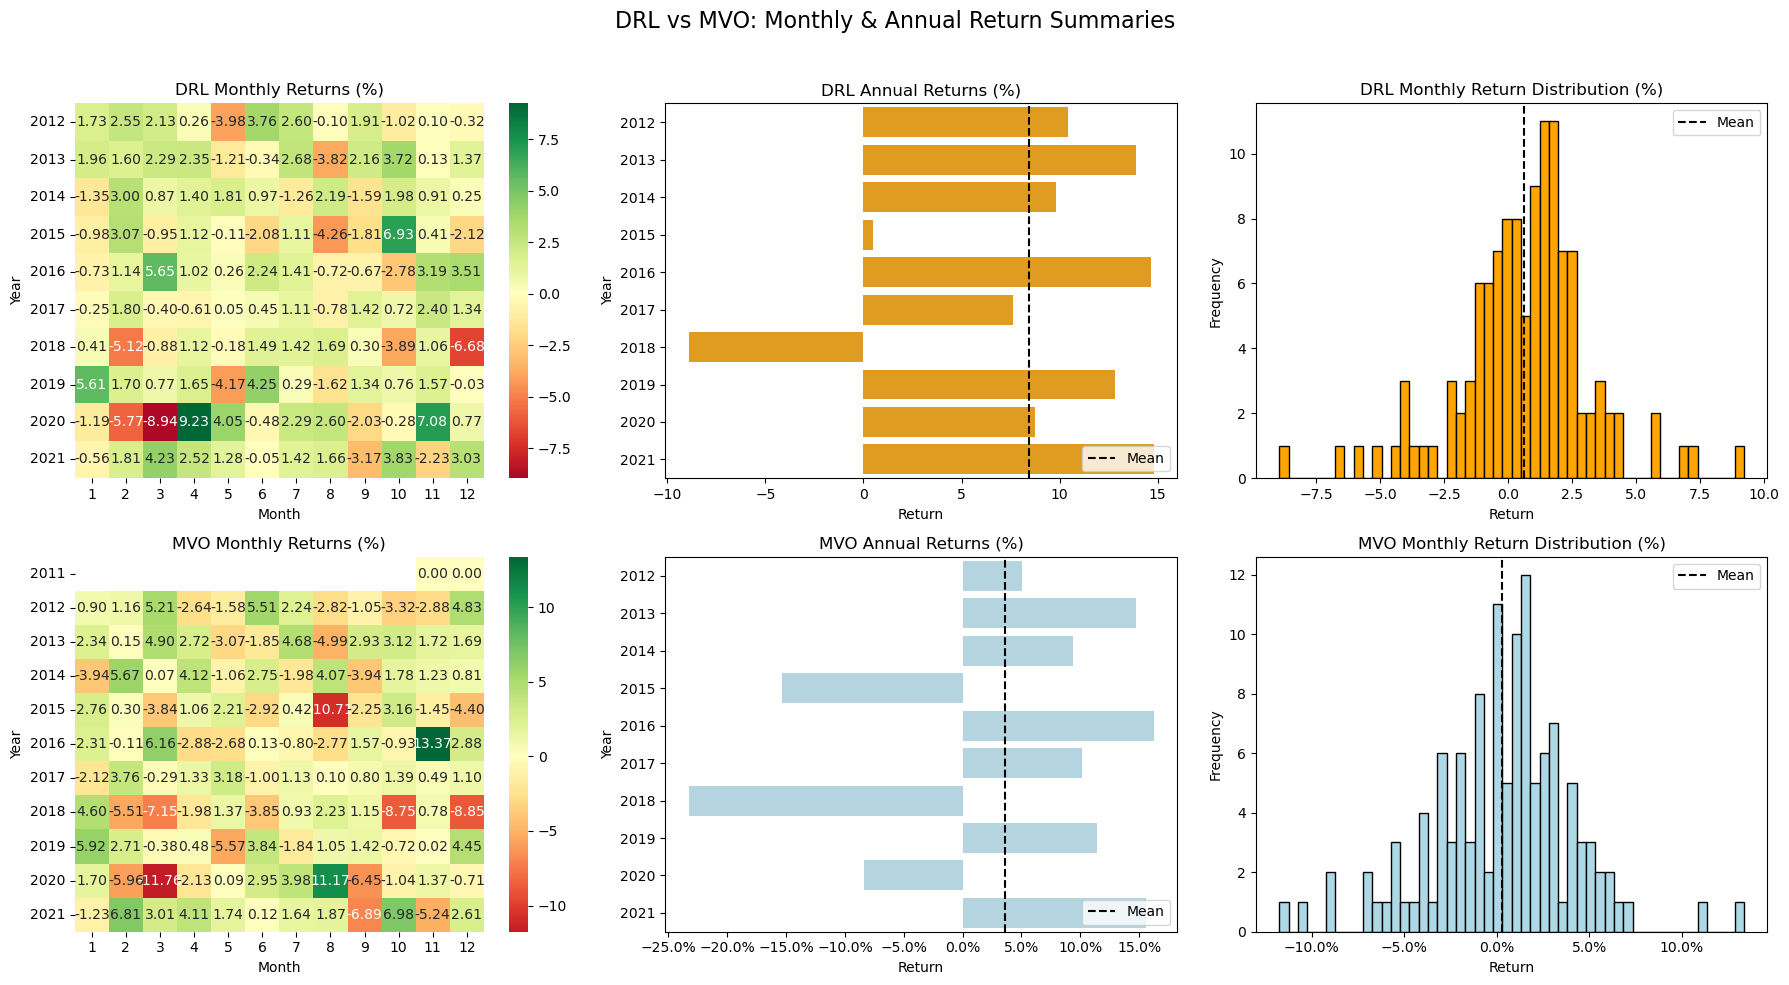

In [47]:
def results():
    import os
    import pandas as pd
    import numpy as np
    from utils import build_env_windows
    from PerformanceAnalysis import analyze_performance
    import matplotlib.pyplot as plt
    import seaborn as sns
    from backtest import backtest
    import matplotlib.ticker as mtick
    # from metrics import compute_metrics


    # --- DRL results from your backtest module ---
    combined_monthly_percentage, combined_annual_percentage, annual_df, cum_portfolio, combined_returns = backtest()

    # --- DRL Annual Return Bar Plot ---
    plt.figure(figsize=(8, 6))
    sns.barplot(
        y="year",
        x="return",
        data=combined_annual_percentage,
        color="orange",
        orient="h"
    )
    mean_drl = combined_annual_percentage['return'].mean()
    plt.axvline(mean_drl, color='black', linestyle='--', label=f"Mean")
    plt.title("DRL Annual Returns")
    plt.xlabel("Return")
    plt.ylabel("Year")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig("./backtest_results/drl_annual_returns.png")
    plt.show()

    # --- DRL Monthly Heatmap ---
    hm = combined_monthly_percentage.to_frame("Return")
    hm['Year'], hm['Month'] = hm.index.year, hm.index.month
    pivot = hm.pivot(index="Year", columns="Month", values="Return")
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
    plt.title("DRL Monthly Returns Heatmap")
    plt.tight_layout()
    plt.savefig("./backtest_results/drl_monthly_heatmap.png")
    plt.show()

    # --- DRL Monthly Distribution ---
    plt.figure(figsize=(10, 5))
    combined_monthly_percentage.hist(bins=50, edgecolor='black', color='orange')
    plt.axvline(combined_monthly_percentage.mean(),
                color='black', linestyle='--', label='Mean')
    plt.title("DRL Monthly Return Distribution")
    plt.xlabel("Return"); plt.ylabel("Frequency")
    plt.grid(True); plt.legend()
    plt.tight_layout()
    plt.savefig("./backtest_results/drl_monthly_distribution.png")
    plt.show()

    # --- DRL vs MVO: Sharpe / Drawdown / Turnover ---

    # First load MVO annual metrics
    annual_df_mvo = pd.read_csv("./backtest_results/annual_metrics_mvo.csv")
    # Ensure numeric
    for col in ("sharpe","drawdown","turnover"):
        annual_df_mvo[col] = pd.to_numeric(annual_df_mvo[col])

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    # Sharpe
    sns.lineplot(ax=axes[0], x="year", y="sharpe", data=annual_df,
                 marker="o", color="orange", label="DRL")
    sns.lineplot(ax=axes[0], x="year", y="sharpe", data=annual_df_mvo,
                 marker="o", color="blue", label="MVO")
    axes[0].axhline(0, linestyle="--", color="grey")
    axes[0].set_title("Sharpe Ratio"); axes[0].set_xlabel("Year")
    axes[0].grid(True)

    # Drawdown
    sns.lineplot(ax=axes[1], x="year", y="drawdown", data=annual_df,
                 marker="o", color="orange", label="DRL")
    sns.lineplot(ax=axes[1], x="year", y="drawdown", data=annual_df_mvo,
                 marker="o", color="blue", label="MVO")
    axes[1].set_title("Max Drawdown"); axes[1].set_xlabel("Year")
    axes[1].grid(True)

    # Turnover
    sns.lineplot(ax=axes[2], x="year", y="turnover", data=annual_df,
                 marker="o", color="orange", label="DRL")
    sns.lineplot(ax=axes[2], x="year", y="turnover", data=annual_df_mvo,
                 marker="o", color="blue", label="MVO")
    axes[2].set_title("Avg Daily Turnover"); axes[2].set_xlabel("Year")
    axes[2].grid(True)

    plt.suptitle("DRL vs MVO: Sharpe, Drawdown & Turnover", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig("./backtest_results/drl_vs_mvo_metrics.png")
    plt.show()

    # ——— Combined Portfolio Value: DRL vs MVO ———

    df1 = pd.read_csv("./backtest_results/portfolio_value_mvo.csv",
                               index_col=0, parse_dates=True)
    port_val_mvo = df1.iloc[:, 0]

    plt.figure(figsize=(12, 6))
    # DRL line
    plt.plot(cum_portfolio.index, cum_portfolio.values * 10,
             color='orange', linewidth=2, label='DRL')
    # MVO line
    plt.plot(port_val_mvo.index, port_val_mvo.values,
             color='blue', linewidth=2, label='MVO')

    plt.title("Cumulative Portfolio Value: DRL vs MVO")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig("./backtest_results/drl_vs_mvo_combined_portfolio_value.png")
    plt.show()

    # --- Now the rest of the MVO plots ---

    # 1) MVO Annual Returns (horizontal bar)
    plt.figure(figsize=(8, 6))
    sns.barplot(y="year", x="return", data=annual_df_mvo,
                color="lightblue", orient="h")
    plt.axvline(annual_df_mvo['return'].mean(),
                color='black', linestyle='--', label='Mean')
    plt.title("MVO Annual Returns")
    plt.xlabel("Return"); plt.ylabel("Year")
    plt.grid(axis='x', linestyle='--', alpha=0.7); plt.legend()
    plt.tight_layout()
    plt.savefig("./backtest_results/mvo_annual_returns_horiz.png")
    plt.show()

    # 3) MVO Monthly Heatmap
    df2 = pd.read_csv("./backtest_results/combined_monthly_mvo.csv",
                         index_col=0, parse_dates=True)
    cm_mvo = df2.iloc[:, 0]
    hm2 = cm_mvo.to_frame("Return")
    hm2['Year'], hm2['Month'] = hm2.index.year, hm2.index.month
    pivot2 = hm2.pivot(index="Year", columns="Month", values="Return")
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot2, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
    plt.title("MVO Monthly Returns Heatmap")
    plt.tight_layout()
    plt.savefig("./backtest_results/mvo_monthly_heatmap.png")
    plt.show()

    # 4) MVO Monthly Distribution
    plt.figure(figsize=(10, 5))
    cm_mvo.hist(bins=50, edgecolor='black')
    plt.axvline(cm_mvo.mean(), color='black', linestyle='--', label='Mean')
    plt.title("MVO Monthly Return Distribution")
    plt.xlabel("Return"); plt.ylabel("Frequency")
    plt.grid(True); plt.legend()
    plt.tight_layout()
    plt.savefig("./backtest_results/mvo_monthly_distribution.png")
    plt.show()

    # ——— Compute & display full metrics for DRL vs MVO ———

    # 1) DRL already has `combined_returns` (daily returns series)
    drl_stats = compute_metrics(combined_returns)

    # 2) Load MVO daily returns and compute its stats
    mvo_daily = pd.read_csv(
        "./backtest_results/combined_daily_returns_mvo.csv",
        index_col=0, parse_dates=True
    ).iloc[:, 0]                # assume one column of returns
    mvo_stats = compute_metrics(mvo_daily)

    # 3) Build a comparison DataFrame
    comp_df = pd.DataFrame({
        "Metric": drl_stats.keys(),
        "DRL":    drl_stats.values(),
        "MVO":    [mvo_stats[k] for k in drl_stats.keys()]
    })

    # 4) Print it nicely
    pd.set_option("display.float_format", "{:.4f}".format)
    print("\n\n=== Full Performance Metrics: DRL vs MVO ===")
    print(comp_df.to_markdown())





    # ——— Grid of 2 rows × 3 cols: heatmap, annual returns, distribution ———

    # Prepare the data
    # DRL
    drl_heat = combined_monthly_percentage.to_frame("Return")
    drl_heat['Year'], drl_heat['Month'] = drl_heat.index.year, drl_heat.index.month
    drl_pivot = drl_heat.pivot(index="Year", columns="Month", values="Return")
    mean_drl = combined_annual_percentage['return'].mean()

    # MVO
    annual_df_mvo = pd.read_csv("./backtest_results/annual_metrics_mvo.csv")
    mvo_monthly = pd.read_csv(
        "./backtest_results/combined_monthly_mvo.csv",
        index_col=0, parse_dates=True
    ).iloc[:, 0]
    mvo_heat = mvo_monthly.to_frame("Return")
    mvo_heat['Year'], mvo_heat['Month'] = mvo_heat.index.year, mvo_heat.index.month
    mvo_pivot = mvo_heat.pivot(index="Year", columns="Month", values="Return")
    mean_mvo = annual_df_mvo['return'].mean()

    # Create 2×3 subplot
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # --- Row 1: DRL ---
    # 1) Heatmap
    sns.heatmap(drl_pivot, annot=True, fmt=".2f", cmap="RdYlGn", center=0,
                ax=axes[0,0])
    axes[0,0].set_title("DRL Monthly Returns (%)")

    # 2) Annual returns (horizontal bar)
    sns.barplot(y="year", x="return", data=combined_annual_percentage,
                color="orange", orient="h", ax=axes[0,1])
    axes[0,1].axvline(mean_drl, color='black', linestyle='--', label="Mean")
    axes[0,1].set_title("DRL Annual Returns (%)")
    axes[0,1].set_xlabel("Return"); axes[0,1].set_ylabel("Year")
    axes[0,1].legend(loc='lower right')

    # 3) Monthly distribution
    axes[0,2].hist(combined_monthly_percentage, bins=50, edgecolor='black', color='orange')
    axes[0,2].axvline(combined_monthly_percentage.mean(),
                      color='black', linestyle='--', label='Mean')
    axes[0,2].set_title("DRL Monthly Return Distribution (%)")
    axes[0,2].set_xlabel("Return"); axes[0,2].set_ylabel("Frequency")
    axes[0,2].legend()

    # --- Row 2: MVO ---
    # 1) Heatmap
    mvo_pivot_percentage = mvo_pivot * 100

    sns.heatmap(mvo_pivot_percentage, annot=True, fmt=".2f", cmap="RdYlGn", center=0,
                ax=axes[1,0])
    axes[1,0].set_title("MVO Monthly Returns (%)")

    # 2) Annual returns (horizontal bar)
    sns.barplot(y="year", x="return", data=annual_df_mvo,
                color="lightblue", orient="h", ax=axes[1,1])
    axes[1,1].axvline(mean_mvo, color='black', linestyle='--', label="Mean")
    axes[1,1].set_title("MVO Annual Returns (%)")
    axes[1,1].set_xlabel("Return"); axes[1,1].set_ylabel("Year")
    axes[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # show %
    axes[1,1].legend(loc='lower right')

    # 3) Monthly distribution
    axes[1,2].hist(mvo_monthly, bins=50, edgecolor='black', color='lightblue')
    axes[1,2].axvline(mvo_monthly.mean(),
                      color='black', linestyle='--', label='Mean')
    axes[1,2].set_title("MVO Monthly Return Distribution (%)")
    axes[1,2].set_xlabel("Return"); axes[1,2].set_ylabel("Frequency")
    axes[1, 2].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[1,2].legend()

    plt.suptitle("DRL vs MVO: Monthly & Annual Return Summaries", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("./backtest_results/drl_mvo_summary_grid.png")
    plt.show()


if __name__ == "__main__":
    results()
